# Content and Objectives

- Show received constellation points under different kinds of fading distributions
- channel is assumed to be slow flat, i.e.: $$Y= HX+Z_Y, \quad Z_Y\sim\mathcal{CN}(0,\sigma_Y^2)$$

# Import

In [1]:
# importing
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# constellation
constellation = np.array( [1+1j, 1-1j, -1-1j, -1+1j ])
constellation /= np.sqrt( np.average( np.abs( constellation )**2 ) )

# SNR in dB
SNR_dB = 13
SNR = 10**( SNR_dB / 10 )
sigma2 = 1 / ( 2 * SNR )

# number of points
N_points = int( 1e5 )

# Parameters for noise distributions
sigma2_Rayleigh = 1

sigma2_Rice = 1
A2_Rice = 10

M_Nakagami = 1
Omega_Nakagami = 5

# Simulation

In [4]:
# do you want to normalize???
# choose according Boolean here
normalized = 1

In [5]:
# delay of paths
points = np.random.choice( constellation, size = N_points, replace = True)

# init random generator object
rng = np.random.default_rng()


# get noise

Z_Y = np.sqrt( sigma2 / 2 ) * ( rng.normal( 0, 1, N_points) + 1j * rng.normal( 0, 1, N_points ) )


# get fading coefficients (you may opt in the interesting scenario)
complex_Rayleigh_real = rng.normal( 0, 1, N_points ) 
complex_Rayleigh_imag = rng.normal( 0, 1, N_points ) 
H_Rayleigh = np.abs( np.sqrt( sigma2_Rayleigh / 2 ) * ( complex_Rayleigh_real + 1j * complex_Rayleigh_imag ) )

complex_Rice_real = rng.normal( 0, 1, N_points ) + np.sqrt( A2_Rice / 2 )
complex_Rice_imag = rng.normal( 0, 1, N_points ) + np.sqrt( A2_Rice / 2 )
H_Rice = np.abs( np.sqrt( sigma2_Rice / 2 ) * ( complex_Rice_real + 1j * complex_Rice_imag ) )

RV_Nakagami = stats.nakagami( nu=M_Nakagami, loc=0, scale=np.sqrt( Omega_Nakagami / M_Nakagami ) )
H_Nakagami = RV_Nakagami.rvs( size=N_points )

# normalizing?
if normalized:
    H_Rayleigh /= np.sqrt( np.average( np.abs( H_Rayleigh )**2 ) )
    H_Rice /= np.sqrt( np.average( np.abs( H_Rice )**2 ) )
    H_Nakagami /= np.sqrt( np.average( np.abs( H_Nakagami )**2 ) )


# fade and noise
Y_Rayleigh = H_Rayleigh * points + Z_Y
Y_Rice = H_Rice * points + Z_Y
Y_Nakagami = H_Nakagami * points + Z_Y

### Plotting the fading pdfs

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\O'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\O'
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/267486036.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.hist( H_Rayleigh, bins=50, density=True, label='$\hat{P}(x)$' )
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/267486036.py:12: SyntaxWarning: invalid escape sequence '\h'
  plt.hist( H_Rice, bins=50, density=True, label='$\hat{P}(x)$' )
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/267486036.py:20: SyntaxWarning: invalid escape sequence '\h'
  plt.hist( H_Nakagami, bins=50, density=True, label='$\hat{P}(x)$' )
/var/folders/g

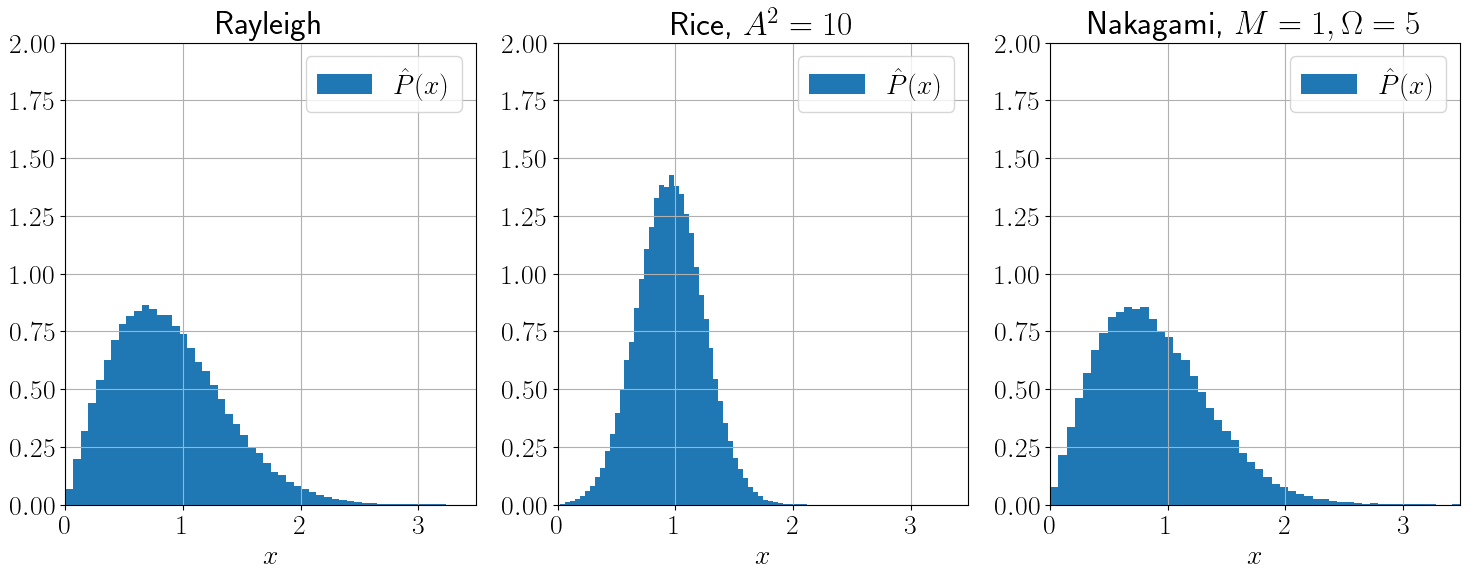

In [6]:
# first show histograms of fading coefficients
max_x = np.max( ( np.max( H_Rayleigh ), np.max( H_Rice ), np.max( H_Nakagami )) )

plt.subplot(131)
plt.hist( H_Rayleigh, bins=50, density=True, label='$\hat{P}(x)$' )
plt.title('Rayleigh')
plt.xlabel('$x$')
plt.grid( 1 ); plt.legend()
plt.xlim( (0, max_x)); plt.ylim( (0,1+int(normalized)))

plt.subplot(132)
plt.hist( H_Rice, bins=50, density=True, label='$\hat{P}(x)$' )
plt.title('Rice, $A^2={}$'.format(A2_Rice) )
plt.xlabel('$x$')
plt.grid( 1 ); plt.legend()
plt.xlim( (0, max_x)); plt.ylim( (0,1+int(normalized)))


plt.subplot(133)
plt.hist( H_Nakagami, bins=50, density=True, label='$\hat{P}(x)$' )
plt.title('Nakagami, $M={}, \Omega={}$'.format( M_Nakagami, Omega_Nakagami ) )
plt.xlabel('$x$')
plt.grid( 1 ); plt.legend()
plt.xlim( (0, max_x)); plt.ylim( (0,1+int(normalized)))



plt.show()

### Plotting faded constellation diagrams

<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\O'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\O'
<>:30: SyntaxWarning: invalid escape sequence '\{'
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/646331334.py:9: SyntaxWarning: invalid escape sequence '\{'
  plt.xlabel('Re$\{y\}$')
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/646331334.py:10: SyntaxWarning: invalid escape sequence '\{'
  plt.ylabel('Im$\{y\}$')
/var/folders/gl/klr5r63x1n7gc51klm74k_900000gn/T/ipykernel_8519/646331334.py:20: SyntaxWarning: invalid escape sequence '\{'
  plt.xlabel('Re$\{y\}$')
/var/folders/gl/klr5r63x1n7gc51klm74k_90

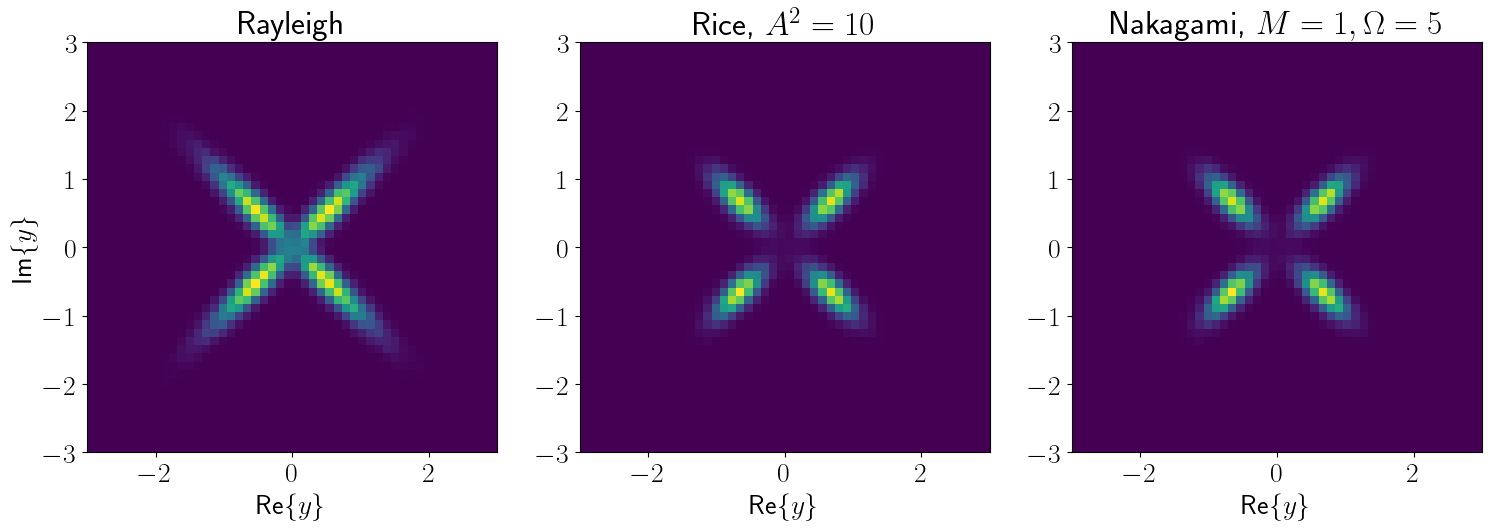

In [7]:
# now show effects on the constellation diagram
plt.subplot(131)
heatmap, xedges, yedges = np.histogram2d( np.real( Y_Rayleigh ), np.imag( Y_Rayleigh ), range=[ [-3,3],[-3,3] ],  bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title('Rayleigh')
plt.xlim( (-3,3) ); plt.ylim( (-3,3) )
plt.xlabel('Re$\{y\}$')
plt.ylabel('Im$\{y\}$')


plt.subplot(132)
heatmap, xedges, yedges = np.histogram2d( np.real( Y_Rice ), np.imag( Y_Rice ), range=[ [-3,3],[-3,3] ],  bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title('Rice, $A^2={}$'.format(A2_Rice) )
plt.xlim( (-3,3) ); plt.ylim( (-3,3) )
plt.xlabel('Re$\{y\}$')


plt.subplot(133)
eatmap, xedges, yedges = np.histogram2d( np.real( Y_Nakagami ), np.imag( Y_Nakagami ), range=[ [-3,3],[-3,3] ],  bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title('Nakagami, $M={}, \Omega={}$'.format( M_Nakagami, Omega_Nakagami ) )
plt.xlim( (-3,3) ); plt.ylim( (-3,3) )
plt.xlabel('Re$\{y\}$')

plt.show()
